In [17]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#explore
import scipy.stats as stats

#visuals
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


#default pandas decimal display formatting
pd.options.display.float_format='{:20,.2f}'.format

import acquire
import prepare
import summarize

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_excel('dating.xlsx')

In [26]:
df.describe()

,Female,Male
count,"47,540.00","47,540.00"
mean,23.05,24.27
std,23.44,6.32
min,0.00,5.00
25%,19.00,20.00
50%,22.00,23.00
75%,25.00,27.00
max,"5,000.00",420.00


In [46]:
df1= df1.loc[df1['Female'] >=18]



In [49]:
df1= df1.loc[df1['Male'] >=18]

In [51]:
df1= df1.loc[df1['Male'] <=75]

In [53]:
df1= df1.loc[df1['Female'] <=75]

In [54]:
summarize.df_summary(df1)

--- Shape: (42893, 2)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42893 entries, 0 to 47547
Data columns (total 2 columns):
Female    42893 non-null float64
Male      42893 non-null float64
dtypes: float64(2)
memory usage: 1005.3 KB
--- Descriptions
                    Female                 Male
count            42,893.00            42,893.00
mean                 23.61                25.01
std                   4.96                 5.68
min                  18.00                18.00
25%                  20.00                21.00
50%                  23.00                24.00
75%                  26.00                28.00
max                  75.00                73.00
--- Nulls By Column
        num_rows_missing     pct_rows_missing
Female                 0                 0.00
Male                   0                 0.00
--- Nulls By Row
  num_cols_missing pct_cols_missing  num_rows
0                0              0.0     42893
--- Value Counts
(17.942, 23.7]    2

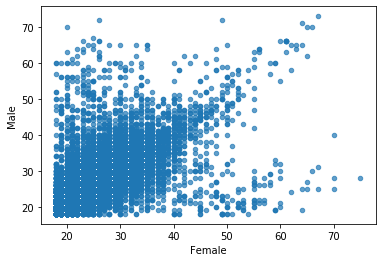

In [65]:
df1.plot.scatter(y='Male', x='Female', alpha=.7)

In [66]:
from sklearn.cluster import KMeans

X = df1[['Male', 'Female']]

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[27.60192537 25.48124256]
 [19.92052728 19.39827796]
 [40.48968363 44.03851444]
 [23.5596745  22.33461423]
 [43.92242424 27.36242424]
 [31.80406654 30.84616964]]


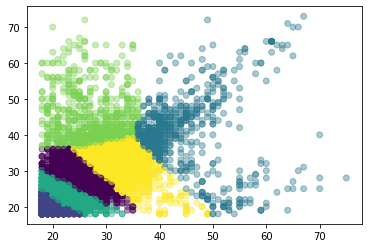

In [68]:
plt.scatter(df1.Female, df1.Male, c = kmeans.labels_, alpha=.4)

In [62]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

,Male,Female
cluster,,
0,29.08,26.65
1,20.19,19.60
2,33.76,33.72
3,49.06,36.17
4,24.29,22.96


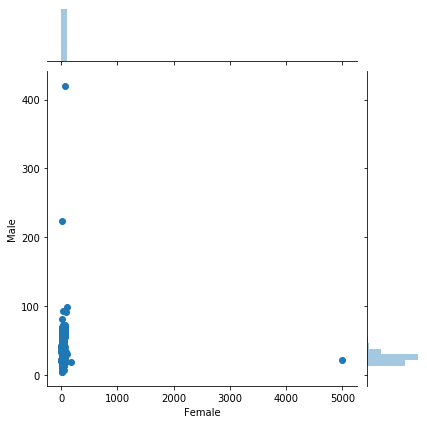

In [11]:
df1['cluster'] = kmeans.predict(X)

df1.cluster = 'cluster_' + df1.cluster.astype('str'